# Darknet Configuration

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15376, done.
remote: Total 15376 (delta 0), reused 0 (delta 0), pack-reused 15376
Receiving objects: 100% (15376/15376), 13.98 MiB | 14.73 MiB/s, done.
Resolving deltas: 100% (10341/10341), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [4]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

#Helper function for displaying image.

In [5]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

#Connecting google drive.

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive/yolov4

Mounted at /content/gdrive
backup				  test_dataset_luma.zip
chart_yolov3_1.png		  test_dataset.zip
chart_yolov3_2.png		  test_google.zip
generate_test.py		  training_loss_chart.jpg
generate_train.py		  v2_YOLOv4
kfold_cfg			  V2_YOLOv4_Handgun_Detection_Training.ipynb
obj.data			  YOLOv3_Handgun_Detection_Training.ipynb
obj.names			  yolov3-obj.cfg
obj.zip				  yolov3-obj-testing.cfg
Own_Images			  YOLOv4_Handgun_Detection_Testing.ipynb
Realtime_Handgun_Detection.ipynb  YOLOv4_Handgun_Detection_Training.ipynb
Results				  yolov4-obj.cfg
Stratified-Kfold.ipynb		  yolov4-obj-testing.cfg
Test_Dataset


#Uploading files to Colab Virtual Machine necessary for training.

In [7]:
# copy over both datasets into the root directory of the Colab VM
#!cp /mydrive/yolov4/obj.zip ../
# !cp /mydrive/yolov4/test_dataset.zip ../
!cp /mydrive/yolov4/Test_Dataset/google_dataset_5.zip ../

In [8]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
#!unzip ../obj.zip -d data/
!unzip ../google_dataset_5.zip -d data/

Archive:  ../google_dataset_5.zip
   creating: data/test/
  inflating: data/test/gun401.jpg    
  inflating: data/test/gun401.txt    
  inflating: data/test/gun402.jpg    
  inflating: data/test/gun402.txt    
  inflating: data/test/gun403.jpg    
  inflating: data/test/gun403.txt    
  inflating: data/test/gun404.jpg    
  inflating: data/test/gun404.txt    
  inflating: data/test/gun405.jpg    
  inflating: data/test/gun405.txt    
  inflating: data/test/gun406.jpg    
  inflating: data/test/gun406.txt    
  inflating: data/test/gun407.jpg    
  inflating: data/test/gun407.txt    
  inflating: data/test/gun408.jpg    
  inflating: data/test/gun408.txt    
  inflating: data/test/gun409.jpg    
  inflating: data/test/gun409.txt    
  inflating: data/test/gun410.jpg    
  inflating: data/test/gun410.txt    
  inflating: data/test/gun411.jpg    
  inflating: data/test/gun411.txt    
  inflating: data/test/gun412.jpg    
  inflating: data/test/gun412.txt    
  inflating: data/test/gun413.

In [ ]:
# # download cfg to google drive and change its name
# !cp cfg/yolov3.cfg /mydrive/yolov4/yolov3-obj.cfg

In [9]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov4/yolov3-obj.cfg ./cfg

In [10]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4/obj.names ./data
!cp /mydrive/yolov4/obj.data  ./data

In [11]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
#!cp /mydrive/yolov4/generate_train.py ./
!cp /mydrive/yolov4/generate_test.py ./

In [12]:
#!python generate_train.py
!python generate_test.py

In [ ]:
# We're going to convert the class index on the .txt files. As we're working with only one class, it's supposed to be class 0.
# If the index is different from 0 then we're going to change it.
import glob
import os
import re

txt_file_paths = glob.glob(r"data/test/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

In [14]:
!./darknet detector map data/obj.data cfg/yolov3-obj.cfg /mydrive/yolov4/backup/yolov3-obj_final.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.5

In [ ]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


#Getting the pre-trained Yolov3 weight file for training.

In [ ]:
# !wget http://pjreddie.com/media/files/darknet53.conv.74

#Converting the annotated image's text files to one class. (15 to 0)

In [ ]:
# We're going to convert the class index on the .txt files. As we're working with only one class, it's supposed to be class 0.
# If the index is different from 0 then we're going to change it.
import glob
import os
import re

txt_file_paths = glob.glob(r"data/obj/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

In [ ]:
# We're going to convert the class index on the .txt files. As we're working with only one class, it's supposed to be class 0.
# If the index is different from 0 then we're going to change it.
import glob
import os
import re

txt_file_paths = glob.glob(r"data/test/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

15 0.493636 0.502370 0.896364 0.881517

['15', '0.493636', '0.502370', '0.896364', '0.881517']
0 data/test/gun446.txt
0 0.493636 0.502370 0.896364 0.881517
15 0.442222 0.575556 0.875556 0.662222

['15', '0.442222', '0.575556', '0.875556', '0.662222']
1 data/test/gun34.txt
0 0.442222 0.575556 0.875556 0.662222
15 0.553333 0.431111 0.875556 0.773333

['15', '0.553333', '0.431111', '0.875556', '0.773333']
1 data/test/gun34.txt
0 0.553333 0.431111 0.875556 0.773333
15 0.670068 0.397661 0.489796 0.748538

['15', '0.670068', '0.397661', '0.489796', '0.748538']
2 data/test/gun114.txt
0 0.670068 0.397661 0.489796 0.748538
15 0.253401 0.526316 0.500000 0.760234

['15', '0.253401', '0.526316', '0.500000', '0.760234']
2 data/test/gun114.txt
0 0.253401 0.526316 0.500000 0.760234
15 0.337333 0.268365 0.141333 0.143365

['15', '0.337333', '0.268365', '0.141333', '0.143365']
3 data/test/gun452.txt
0 0.337333 0.268365 0.141333 0.143365
15 0.518333 0.458333 0.596667 0.833333

['15', '0.518333', '0.4583

#Command to start the training.

v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.878779), count: 3, class_loss = 0.042098, iou_loss = 0.027079, total_loss = 0.069177 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.851293), count: 1, class_loss = 0.051065, iou_loss = 0.014201, total_loss = 0.065266 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 total_bbox = 77365, rewritten_bbox = 0.006463 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.820940), count: 2, class_loss = 0.256494, iou_loss = 0.080925, total_loss = 0.337419 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.786175), count: 4, class_loss = 0.025389, iou_loss = 0.160236, total_loss = 0.185624 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_l

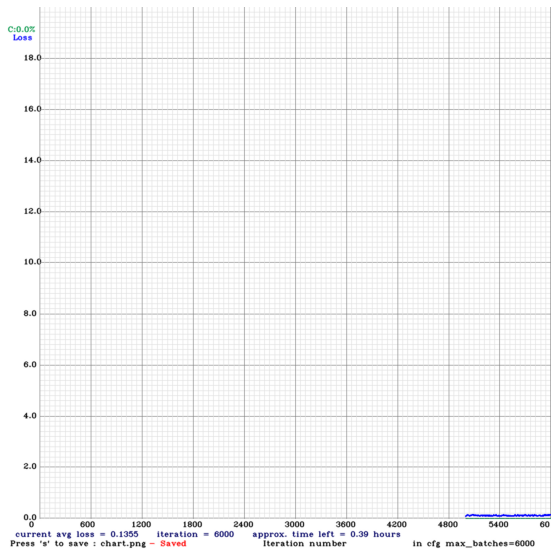

In [ ]:
# train your custom detector
#!./darknet detector train data/obj.data cfg/yolov3-obj.cfg darknet53.conv.74 -dont_show

# kick off training from where it last saved
# !./darknet detector train data/obj.data cfg/yolov3-obj.cfg /mydrive/yolov4/backup/yolov3-obj_last.weights -dont_show
# imShow('chart.png')
# !cp chart.png /mydrive/yolov4/chart_yolov3_1.png

#Getting the Mean Average Precision of the trained model.
To get the most accurate model for testing.

In [ ]:
# !./darknet detector map data/obj.data cfg/yolov3-obj.cfg /mydrive/yolov4/backup/yolov3-obj_2000.weights

In [ ]:
# !./darknet detector map data/obj.data cfg/yolov3-obj.cfg /mydrive/yolov4/backup/yolov3-obj_3000.weights

In [ ]:
# !./darknet detector map data/obj.data cfg/yolov3-obj.cfg /mydrive/yolov4/backup/yolov3-obj_4000.weights

In [ ]:
# !./darknet detector map data/obj.data cfg/yolov3-obj.cfg /mydrive/yolov4/backup/yolov3-obj_5000.weights

In [ ]:
!./darknet detector map data/obj.data cfg/yolov3-obj.cfg /mydrive/yolov4/backup/yolov3-obj_final.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.5

In [ ]:
# !./darknet detector map data/obj.data cfg/yolov3-obj.cfg /mydrive/yolov4/backup/yolov3-obj_5000.weights -iou_thresh 0.75

#Testing the model using the test data set.
Extracting the output into txt and json file.

In [ ]:
# !./darknet detector test data/obj.data /mydrive/yolov4/yolov4-obj-testing.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show -ext_output < data/test.txt > result_test.txt

In [ ]:
# !./darknet detector test data/obj.data /mydrive/yolov4/yolov4-obj-testing.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -ext_output -dont_show -out result_test.json < data/test.txt

#Setting the custom cfg for testing. 

In [ ]:
# %cd cfg
# !sed -i 's/batch=64/batch=1/' yolov3-obj.cfg
# !sed -i 's/subdivisions=16/subdivisions=1/' yolov3-obj.cfg
# !cp yolov3-obj.cfg /mydrive/yolov4/yolov3-obj-testing.cfg
# %cd ..

#Command for testing the model. (Images)

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.59

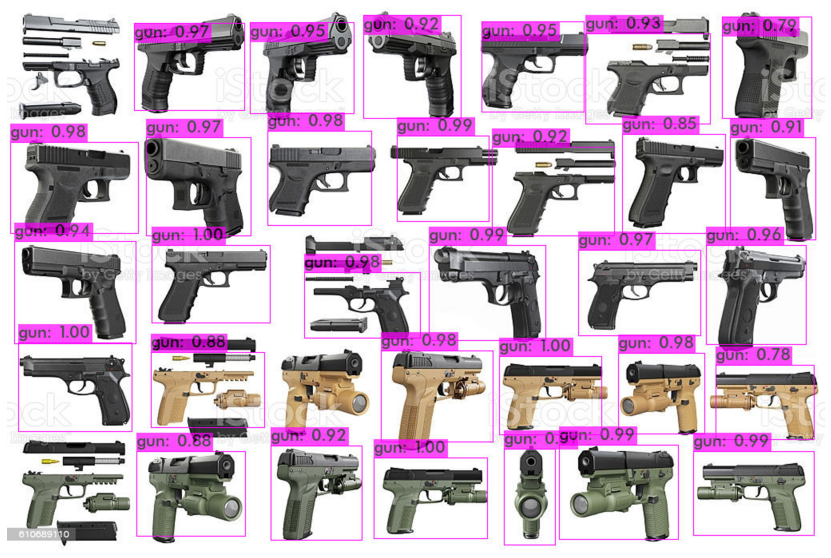

In [ ]:
!./darknet detector test data/obj.data /mydrive/yolov4/yolov3-obj-testing.cfg /mydrive/yolov4/backup/yolov3-obj_final.weights /mydrive/yolov4/Own_Images/armas2.jpg -thresh 0.75
imShow('predictions.jpg')
!cp predictions.jpg /mydrive/yolov4/Results/predictions_yolov3.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.59

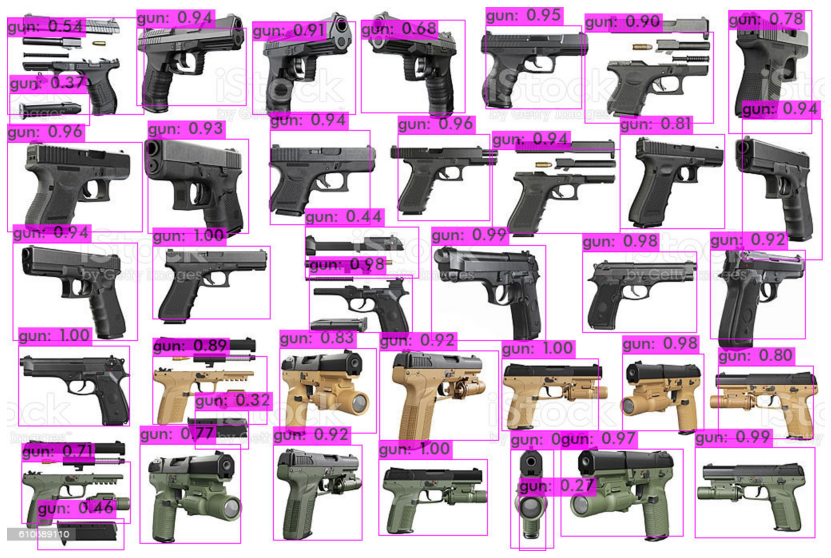

In [ ]:
!./darknet detector test data/obj.data /mydrive/yolov4/yolov3-obj-testing.cfg /mydrive/yolov4/backup/yolov3-obj_5000.weights /mydrive/yolov4/Own_Images/armas2.jpg
imShow('predictions.jpg')
!cp predictions.jpg /mydrive/yolov4/Results/predictions_yolov3.jpg

#Command for testing the model. (Videos)

In [ ]:
!./darknet detector demo data/obj.data /mydrive/yolov4/yolov3-obj-testing.cfg /mydrive/yolov4/backup/yolov3-obj_last.weights -dont_show /mydrive/yolov4/Own_Images/video9.mp4 -i 0 -out_filename results.mp4
!cp results.mp4 /mydrive/yolov4/Results/results_yolov3.mp4

#Helper function for displaying videos

In [ ]:
import io 
from IPython.display import HTML
from base64 import b64encode
def show_video(file_name, width=640):
  mp4 = open(file_name,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width="{0}" controls>
        <source src="{1}" type="video/mp4">
  </video>
  """.format(width, data_url))

In [ ]:
# convert resulting video from avi to mp4 file format
import os
path_video = os.path.join("","results.mp4")
%cd /content/darknet
!ffmpeg -y -loglevel panic -i results.mp4 output.mp4

# output object tracking video
path_output = os.path.join("","output.mp4")
show_video(path_output, width=960)